## Task 8: Compute Correlations and display Heatmap

Tasks based on instructions given in document https://github.com/ianmcloughlin/principles_of_data_analytics/blob/main/assessment/tasks.md

***
> Calculate the correlation coefficients between the features.
Display the results as a heatmap using matplotlib.

***

In Task #5 where we plotted scatter plots for all 16 Iris feature combinations (image below) ... The degree of these linear relationships in each pair can be quantified with a look at the correlation coefficients between the feature pairs.

<img src="resources/iris_scatterplots.png" width="300"/>

Lets initially print out the result of corr() function in the pandas dataframe.  
This function computes the correlation of all column combination within a dataframe. 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html  
https://www.geeksforgeeks.org/python-pandas-dataframe-corr/  
https://www.w3schools.com/python/pandas/ref_df_corr.asp  
  
This will print out a grid of values for all pairs in dataframe.   
This function excludes NA/Null Values, but since the Iris dataset is such a complete and consistent dataset ... *this is not an issue.*


In [1]:
#import required modules 
import pandas as pd
import numpy as np
from sklearn import datasets as ds
import matplotlib.pyplot as plt
import seaborn as sbn

#load the Iris Dataset
ds_iris = ds.load_iris()

#Convert Iris Dataset to a numpy Array
arr_iris = np.array(ds_iris.data)
#Convert to a Dataframe
df_iris = pd.DataFrame(data=ds_iris.data, columns=ds_iris.feature_names)

# Calculate the correlation matrix
correlation_matrix = df_iris.corr()

# Print the correlation matrix
print(correlation_matrix)




                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


These values can also be visualize with a Heatmap graph.  
The easy way of doing this is with the use of Seaborn statistical data visualization module  
https://seaborn.pydata.org/index.html  
https://seaborn.pydata.org/generated/seaborn.heatmap.html


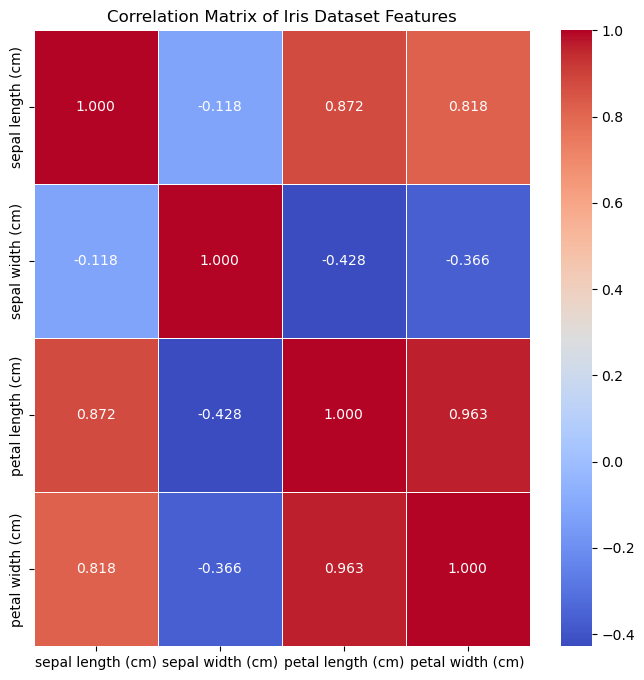

In [6]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 8))
sbn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.title('Correlation Matrix of Iris Dataset Features')
plt.show()

That was easy. But, since you explicitly asked for   
> "Display the results as a <font color = 'magenta'>heatmap using matplotlib.</font>"

So lets try MatplotLib only ...

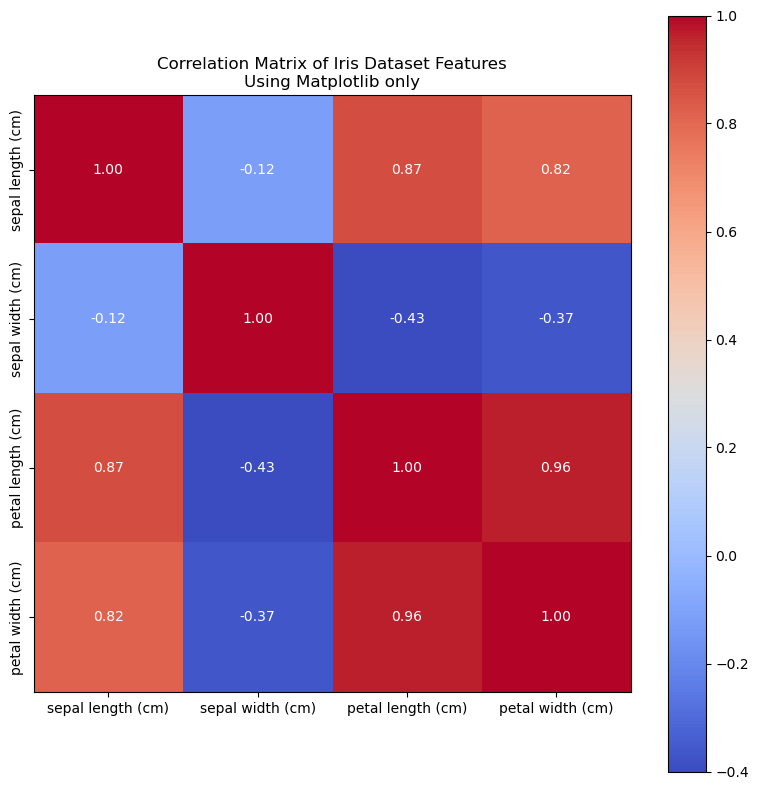

In [21]:
'''
Matplotlib only attempt at a Heatmap
There is no Matplotlib function for "Heatmap", so the work around is to use the imshow() function.
The imshow() function is used to display general images in a plot.
'''

#Start with correlation_matrix values calculated above
# Create the heatmap using Matplotlib only
fig, ax = plt.subplots(figsize=(8,8))
#Need to enter min/max values manually to get similar results as seaborn render
cax = ax.imshow(correlation_matrix, cmap='coolwarm', vmin=-0.4, vmax=1) 

# Add colorbar
fig.colorbar(cax)

# Set ticks and labels
ax.set_xticks(np.arange(4))
ax.set_yticks(np.arange(4))
ax.set_xticklabels(correlation_matrix.columns, rotation=0, ha='center')
ax.set_yticklabels(correlation_matrix.columns, rotation=90, va='center')

# Add the correlation values to grid
for i in range(4):
    for j in range(4):
        text = ax.text(j, i, f"{correlation_matrix.iloc[i, j]:.3f}", ha="center", va="center", color="white")

ax.set_title('Correlation Matrix of Iris Dataset Features\nUsing Matplotlib only')
plt.tight_layout()
plt.show()

Using Matplotlib only involves a bit more code, and plot is not as visually appealing (e.g. Colorbar not aligned with Image plot).  
Using Matplotlib only also requires you to:  
* Add the Colorbar  
* Setup Labels and Ticks for the plot  
* Add the correlation values to each grid of Heatmap  
  
But (in spite of extra code) with these additional setting to be added to plot, Matplotlib does allow more flexibility in how you want to plot a Heatmap 